In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt

# データセット作成

In [2]:
boston = keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston.load_data()

print('Train shape:{}'.format(X_train.shape))
print('Test shape:{}'.format(X_test.shape))

Train shape:(404, 13)
Test shape:(102, 13)


# モデル作成

In [3]:
# 入力層/中間層/出力層 各1層
model = keras.Sequential()
# 入力層
model.add(keras.layers.Dense(64, activation=keras.activations.relu, input_shape=(X_train.shape[1],)))
# 中間層
model.add(keras.layers.Dense(64, activation=keras.activations.relu))
# 出力層
model.add(keras.layers.Dense(1))
# モデルコンパイル
model.compile(loss='mse', optimizer=keras.optimizers.Adam())
# モデル内容の確認
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# 学習

In [4]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 410.4371 - val_loss: 101.6145
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 146.2130 - val_loss: 105.8009
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 81.3206 - val_loss: 91.2739
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 72.5596 - val_loss: 87.1096
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 63.0539 - val_loss: 78.6860
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 61.9836 - val_loss: 74.5605
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 58.5928 - val_loss: 69.0446
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 59.4518 - val_loss: 66.7836
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 57.6005 - val_loss: 92.5111
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 55.5499 - va

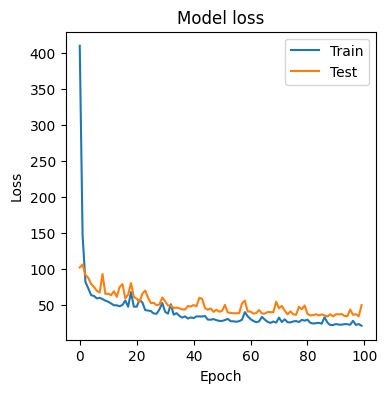

In [5]:
# 学習過程の可視化
plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 予測

In [6]:
pred = model.predict(X_test, verbose=0)

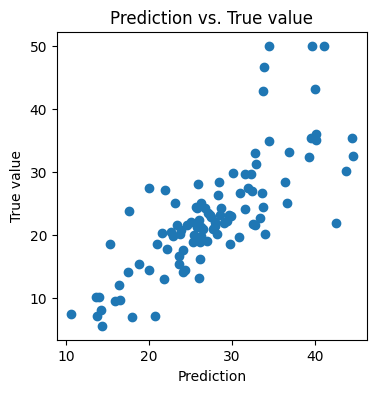

In [7]:
plt.figure(figsize=(4, 4))
plt.scatter(pred, y_test)
plt.title('Prediction vs. True value')
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.show()